# *匯入close, open,high,low,vol

In [1]:
# import pandas as pd
# close = pd.read_csv('close.csv',index_col='date')
# Open = pd.read_csv('Open.csv',index_col='date')
# high = pd.read_csv('high.csv',index_col='date')
# low = pd.read_csv('low.csv',index_col='date')
# vol = pd.read_csv('vol.csv',index_col='date')
# stockid = pd.read_csv('stock_list.csv')

In [2]:
import pandas as pd

df = pd.read_csv("daily.csv", index_col=["stock_id",'date'], parse_dates=['date'])
df.tail()


FileNotFoundError: ignored

# *check

In [ ]:
# close.head()
# close.dtypes
# stockid=stockid['stock_id']
# stockid

In [ ]:
import talib
import numpy as np
import pandas as pd

In [ ]:
df['Close']

stock_id  date      
1101      2010-01-04    34.30
          2010-01-05    35.50
          2010-01-06    36.25
          2010-01-07    35.55
          2010-01-08    35.40
                        ...  
9962      2021-04-19    12.75
          2021-04-20    12.20
          2021-04-21    12.45
          2021-04-22    12.30
          2021-04-23    11.70
Name: Close, Length: 4078037, dtype: float64

交集:
   feature_name  importantce_x  importantce_y
0      midpoint       0.030908       0.010307
1         log10       0.027581       0.018674
2      wclprice       0.025464       0.013065
3          cosh       0.025221       0.020345
4          mult       0.024844       0.015754
5          dema       0.024734       0.008787
6          atan       0.020834       0.010921
7     upperband       0.020222       0.009857
8    middleband       0.020151       0.009401
9           add       0.018781       0.028705
10     midprice       0.017894       0.026932
11         tema       0.017798       0.010628
12     typprice       0.017207       0.036623
13          wma       0.016581       0.013296
14        max_x       0.016256       0.009270
15          tsf       0.015809       0.013383
16       minidx       0.014920       0.017790
17     minindex       0.014837       0.009193
18     minus_dm       0.014815       0.026310
19       correl       0.014739       0.022537
20          obv       0.014547       0.023464
21         fama       0.013462       0.009077
22        min_x       0.012807       0.010320
23     avgprice       0.012752       0.018436
24        max_y       0.012740       0.010811
25        trima       0.011706       0.010292
26          sum       0.011694       0.020926
27          atr       0.011530       0.027786
28   macdsignal       0.011169       0.013100
29         natr       0.011086       0.030466
30         adxr       0.011039       0.028006
31         kama       0.010778       0.008597
32         trix       0.010533       0.020873
33     maxindex       0.010206       0.014766
34          adx       0.009484       0.013334
35       maxidx       0.009329       0.015912
36          ema       0.009119       0.024130
37   ht_dcphase       0.008634       0.014713
38         mama       0.008408       0.011587

In [ ]:
#Open	High	Low	Close
# def bias(n):
#     return df['Close'] / df['Close'].rolling(n, min_periods=1).mean()
#MIDPOINT - 中期点
midpoint = talib.MIDPOINT(df['Close'], timeperiod=14)
#ADXR平均趋向指数的趋向指数,使用ADXR指标，判断ADX趋势。
adxr = talib.ADXR(df['High'], df['Low'], df['Close'], timeperiod=14)
#WCLPRICE加权收盘价
wclprice = talib.WCLPRICE(df['High'], df['Low'], df['Close'])
#COSH双曲正弦函数
cosh = talib.COSH(df['Close'])
#MULT向量乘法运算
mult =talib.MULT(df['High'], df['Low'])
# DEMA双移动平均线:两条移动平均线来产生趋势信号，较长期者用来识别趋势
# 较短期者用来选择时机。正是两条平均线及价格三者的相互作用，才共同产生了趋势信号
dema =talib.DEMA(df['Close'], timeperiod=30)
atan =talib.ATAN(df['Close'])
#BBANDS布林线指标:统计原理，求出股价的标准差及其信赖区间，
#从而确定股价的波动范围及未来走势，利用波带显示股价的安全高低价位，因而也被称为布林带
upperband, middleband, lowerband = talib.BBANDS(df['Close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
#ADD向量加法运算
add =talib.ADD(df['High'], df['Low'])
#MIDPRICE - 中期价格
midprice =talib.MIDPRICE(df['High'], df['Low'], timeperiod=14)
#TEMA三重指数移动平均线（与T3无区别）
tema =talib.TEMA(df['Close'], timeperiod=30)
#TYPPRICE代表性价格
typprice =talib.TYPPRICE(df['High'], df['Low'], df['Close'])
#WMA移动加权平均法,以每次进货的成本加上原有库存存货的成本，除以每次进货数量与原有库存存货的数量之和，据以计算加权平均单位成本，以此为基础计算当月发出存货的成本和期末存货的成本的一种方法
wma =talib.WMA(df['Close'], timeperiod=30)
#MAX周期内最大值
max_x =talib.MAX(df['Close'], timeperiod=30)
#TSF
tsf =talib.TSF(df['Close'], timeperiod=14)
#MINMAX周期内最小值和最大值索引
minidx =talib.MININDEX(df['Close'], timeperiod=30)
#MINUS_DM上升动向值（与DX相似）:分析股票价格在涨跌过程中买卖双方力量均衡点的变化情况，即多空双方的力量的变化受价格波动的影响而发生由均衡到失衡的循环过程，从而提供对趋势判断依据的一种技术指标。
minus_dm =talib.MINUS_DM(df['High'], df['Low'], timeperiod=14)
#CORREL
correl =talib.CORREL(df['High'], df['Low'], timeperiod=30)
#OBV能量潮:通过统计成交量变动的趋势推测股价趋势
obv =talib.OBV(df['Close'], df['Volume']/1000)
#AVGPRICE平均价格函数
avgprice =talib.AVGPRICE(df['Open'], df['High'], df['Low'], df['Close'])
#TRIMA - 三角移动平均线
trima =talib.TRIMA(df['Close'], timeperiod=30)
#ATR真实波动幅度均值:以 N 天的指数移动平均数平均後的交易波动幅度。
atr =talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)


dataset = pd.DataFrame({
    'ADXR': adxr,
    'AVGPRICE': avgprice,
    'OBV': obv,    
    'MINUS_DM': minus_dm,  
    'WMA': wma,    
#     'MININDEX': minidx,
    'TYPPRICE': typprice,
    'TEMA': tema,
    'UPPERBBANDS': upperband,
    'DEMA': dema,
    'WCLPRICE': wclprice,
    
    
    'return':df['Close'].shift(-10) / df['Close']
})

feature_names = list(dataset.columns[:-1])
dataset

ADXR  AVGPRICE           OBV  MINUS_DM        WMA  \
stock_id date                                                                 
1101     2010-01-04        NaN   34.1500  8.299290e+03       NaN        NaN   
         2010-01-05        NaN   35.1000  5.635866e+04       NaN        NaN   
         2010-01-06        NaN   35.8875  9.238540e+04       NaN        NaN   
         2010-01-07        NaN   35.9500  7.785438e+04       NaN        NaN   
         2010-01-08        NaN   35.4750  6.718324e+04       NaN        NaN   
...                        ...       ...           ...       ...        ...   
9962     2021-04-19  29.572913   12.5875  8.506548e+08  0.305011  10.093097   
         2021-04-20  31.326490   12.7000  8.506527e+08  0.283225  10.241678   
         2021-04-21  32.609524   12.3500  8.506540e+08  0.462994  10.401312   
         2021-04-22  34.125041   12.6750  8.506491e+08  0.429923  10.545678   
         2021-04-23  34.599750   12.0625  8.506479e+08  1.099215  10.646001   

                      TYPPRICE       TEMA  UPPERBBANDS       DEMA  WCLPRICE  \
stock_id date                                                                 
1101     2010-01-04  34.200000        NaN          NaN        NaN   34.2250   
         2010-01-05  35.266667        NaN          NaN        NaN   35.3250   
         2010-01-06  36.016667        NaN          NaN        NaN   36.0750   
         2010-01-07  35.816667        NaN          NaN        NaN   35.7500   
         2010-01-08  35.450000        NaN    36.653794        NaN   35.4375   
...                        ...        ...          ...        ...       ...   
9962     2021-04-19  12.533333  10.791586    13.124515  10.475719   12.5875   
         2021-04-20  12.600000  11.107083    13.459858  10.715841   12.5000   
         2021-04-21  12.400000  11.425286    13.466149  10.963375   12.4125   
         2021-04-22  12.650000  11.672634    13.017364  11.167456   12.5625   
         2021-04-23  11.916667  11.775796    12.968767  11.275846   11.8625   

                       return  
stock_id date                  
1101     2010-01-04  0.997085  
         2010-01-05  0.967606  
         2010-01-06  0.937931  
         2010-01-07  0.953586  
         2010-01-08  0.898305  
...                       ...  
9962     2021-04-19       NaN  
         2021-04-20       NaN  
         2021-04-21       NaN  
         2021-04-22       NaN  
         2021-04-23       NaN  

[4078037 rows x 11 columns]

# 檢視資料表有哪些欄位:

In [ ]:
 dataset.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4078037 entries, (1101, Timestamp('2010-01-04 00:00:00')) to (9962, Timestamp('2021-04-23 00:00:00'))
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ADXR         float64
 1   AVGPRICE     float64
 2   OBV          float64
 3   MINUS_DM     float64
 4   WMA          float64
 5   TYPPRICE     float64
 6   TEMA         float64
 7   UPPERBBANDS  float64
 8   DEMA         float64
 9   WCLPRICE     float64
 10  return       float64
dtypes: float64(11)
memory usage: 358.0 MB


# 選出某個股票(2317_鴻海)的ADXR時序，並將其繪製出來

<AxesSubplot:xlabel='date'>

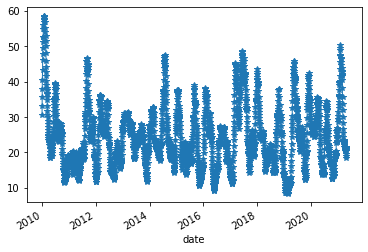

In [ ]:
dataset.loc[2317]["ADXR"].plot(marker="*",lw=1)

# 檢查資料是否有空值

In [ ]:
dataset.isnull().sum()

ADXR              40
AVGPRICE           0
OBV                0
MINUS_DM          13
WMA               29
TYPPRICE           0
TEMA              87
UPPERBBANDS        4
DEMA              58
WCLPRICE           0
return         19516
dtype: int64

In [ ]:
print("before dropping NaN", dataset.shape)
dataset_dropna = dataset.dropna(axis='rows',how='any')
print("after dropping NaN", dataset_dropna.shape)
dataset_dropna
dataset_dropna.to_csv('lstm_dataset_dropna.csv', encoding='utf_8_sig')

before dropping NaN (4078037, 11)
after dropping NaN (4058434, 11)


In [ ]:
dataset_dropna.info()
# dataset_dropna.dtype
dataset_dropna.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4058434 entries, (1101, Timestamp('2010-05-14 00:00:00')) to (9962, Timestamp('2021-04-09 00:00:00'))
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ADXR         float64
 1   AVGPRICE     float64
 2   OBV          float64
 3   MINUS_DM     float64
 4   WMA          float64
 5   TYPPRICE     float64
 6   TEMA         float64
 7   UPPERBBANDS  float64
 8   DEMA         float64
 9   WCLPRICE     float64
 10  return       float64
dtypes: float64(11)
memory usage: 356.3 MB


ADXR           0
AVGPRICE       0
OBV            0
MINUS_DM       0
WMA            0
TYPPRICE       0
TEMA           0
UPPERBBANDS    0
DEMA           0
WCLPRICE       0
return         0
dtype: int64

# Split Train Test dataset

In [ ]:
# dataset = dataset_dropna.reset_index("stock_id","date")
dataset = dataset_dropna.reset_index().set_index("date","stock_id")
dataset
# feature_names
dataset_train = dataset.loc[:'2016']
dataset_valid = dataset.loc['2017':'2019']
dataset_test = dataset.loc['2020':]

# y_train
dataset_train.to_csv('dataset_train.csv', encoding='utf_8_sig')
dataset_valid.to_csv('dataset_valid.csv', encoding='utf_8_sig')
dataset_test.to_csv('dataset_test.csv', encoding='utf_8_sig')

# 從這裡開始

In [ ]:
dataset_train = pd.read_csv("dataset_train.csv", index_col=["stock_id",'date'], parse_dates=['date'])

dataset_valid = pd.read_csv("dataset_valid.csv", index_col=["stock_id",'date'], parse_dates=['date'])
dataset_test = pd.read_csv("dataset_test.csv", index_col=["stock_id",'date'], parse_dates=['date'])
dataset_train
dataset_valid



C:\Users\Mikie\.conda\envs\finlab\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


ADXR  AVGPRICE           OBV  MINUS_DM        WMA  \
stock_id date                                                                 
1101     2017-01-03  18.682210   35.2125  6.684051e+05  2.526807  35.891935   
         2017-01-04  17.919843   35.1875  6.717019e+05  2.346321  35.819785   
         2017-01-05  17.538816   35.1000  6.717019e+05  2.278727  35.751613   
         2017-01-06  17.623302   35.1875  6.717019e+05  2.115960  35.687527   
         2017-01-09  17.641902   35.1000  6.668240e+05  1.964820  35.604086   
...                        ...       ...           ...       ...        ...   
9962     2019-12-25   9.119602    9.9825  8.506456e+08  0.433798   9.994581   
         2019-12-26   9.517476   10.0950  8.506458e+08  0.402812  10.000904   
         2019-12-27   9.886931   10.0075  8.506456e+08  0.374040  10.000130   
         2019-12-30  10.297509   10.0025  8.506456e+08  0.367323   9.999377   
         2019-12-31  11.006127   10.0175  8.506457e+08  0.341086   9.999398   

                      TYPPRICE       TEMA  UPPERBBANDS       DEMA  WCLPRICE  \
stock_id date                                                                 
1101     2017-01-03  35.133333  34.698221    35.524655  35.329693   35.1375   
         2017-01-04  35.183333  34.689596    35.691427  35.282420   35.2000   
         2017-01-05  35.133333  34.686924    35.804984  35.240915   35.1625   
         2017-01-06  35.150000  34.689308    35.307980  35.204631   35.1750   
         2017-01-09  35.050000  34.632488    35.431293  35.129362   35.0125   
...                        ...        ...          ...        ...       ...   
9962     2019-12-25   9.986667  10.013730    10.005799   9.972529    9.9875   
         2019-12-26  10.130000  10.032474    10.100475   9.986617   10.1225   
         2019-12-27  10.010000  10.028859    10.100475   9.985682   10.0050   
         2019-12-30  10.003333  10.025604    10.100348   9.984881   10.0000   
         2019-12-31  10.036667  10.024485    10.100348   9.985451   10.0275   

                       return  
stock_id date                  
1101     2017-01-03  1.011380  
         2017-01-04  1.005674  
         2017-01-05  0.982979  
         2017-01-06  0.991489  
         2017-01-09  1.024355  
...                       ...  
9962     2019-12-25  0.983984  
         2019-12-26  0.973267  
         2019-12-27  0.997998  
         2019-12-30  0.990991  
         2019-12-31  0.992000  

[1187054 rows x 11 columns]

In [ ]:
X_train = dataset_train[feature_names]
y_train = dataset_train['return']
X_valid = dataset_valid[feature_names]
y_valid = dataset_valid['return']
X_test = dataset_test[feature_names]
y_test = dataset_test['return']
# X_train
X_valid

ADXR  AVGPRICE           OBV  MINUS_DM        WMA  \
stock_id date                                                                 
1101     2017-01-03  18.682210   35.2125  6.684051e+05  2.526807  35.891935   
         2017-01-04  17.919843   35.1875  6.717019e+05  2.346321  35.819785   
         2017-01-05  17.538816   35.1000  6.717019e+05  2.278727  35.751613   
         2017-01-06  17.623302   35.1875  6.717019e+05  2.115960  35.687527   
         2017-01-09  17.641902   35.1000  6.668240e+05  1.964820  35.604086   
...                        ...       ...           ...       ...        ...   
9962     2019-12-25   9.119602    9.9825  8.506456e+08  0.433798   9.994581   
         2019-12-26   9.517476   10.0950  8.506458e+08  0.402812  10.000904   
         2019-12-27   9.886931   10.0075  8.506456e+08  0.374040  10.000130   
         2019-12-30  10.297509   10.0025  8.506456e+08  0.367323   9.999377   
         2019-12-31  11.006127   10.0175  8.506457e+08  0.341086   9.999398   

                      TYPPRICE       TEMA  UPPERBBANDS       DEMA  WCLPRICE  
stock_id date                                                                
1101     2017-01-03  35.133333  34.698221    35.524655  35.329693   35.1375  
         2017-01-04  35.183333  34.689596    35.691427  35.282420   35.2000  
         2017-01-05  35.133333  34.686924    35.804984  35.240915   35.1625  
         2017-01-06  35.150000  34.689308    35.307980  35.204631   35.1750  
         2017-01-09  35.050000  34.632488    35.431293  35.129362   35.0125  
...                        ...        ...          ...        ...       ...  
9962     2019-12-25   9.986667  10.013730    10.005799   9.972529    9.9875  
         2019-12-26  10.130000  10.032474    10.100475   9.986617   10.1225  
         2019-12-27  10.010000  10.028859    10.100475   9.985682   10.0050  
         2019-12-30  10.003333  10.025604    10.100348   9.984881   10.0000  
         2019-12-31  10.036667  10.024485    10.100348   9.985451   10.0275  

[1187054 rows x 10 columns]

In [ ]:
X_valid.shape, y_train.shape

((1187054, 10), (2335255,))

<AxesSubplot:xlabel='stock_id'>

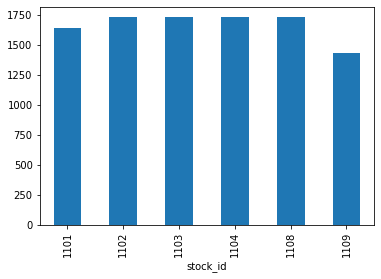

In [ ]:
# 略為了解一下，前一萬個，他們的時序列長度為何 (x軸為Stock_ID, y軸為時間點)
X_train.head(10000).groupby(level=0) \
                   .size() \
                   .plot(kind="bar")

以上可見，大多train股票特徵時序，長度皆位於1750以內。

<AxesSubplot:xlabel='stock_id'>

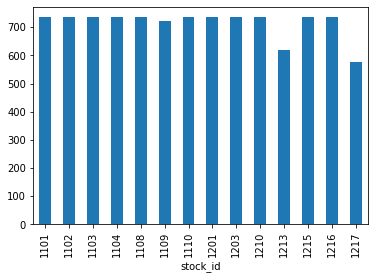

In [ ]:
# 略為了解一下，前一萬個，他們的時序列長度為何 (x軸為Stock_ID, y軸為時間點)
X_valid.head(10000).groupby(level=0) \
                   .size() \
                   .plot(kind="bar")

In [ ]:
以上可見，大多valid股票特徵時序，長度皆位於750以內。

<AxesSubplot:xlabel='stock_id'>

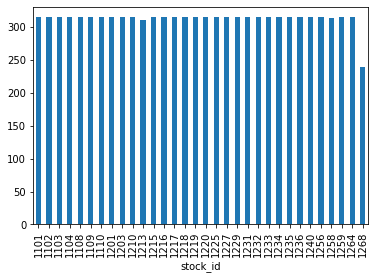

In [ ]:
# 略為了解一下，前一萬個，他們的時序列長度為何 (x軸為Stock_ID, y軸為時間點)
X_test.head(10000).groupby(level=0) \
                   .size() \
                   .plot(kind="bar")

以上可見，大多股票test特徵時序，長度皆位於350以內。

In [ ]:
stock_list = pd.read_csv('stock_list.csv')
stock_list
# dataset['stock_id']
# dataset.loc[stock_id]
stock_ids=pd.Series(stock_list['stock_id'])
stock_ids
# pids = pd.Series(dataset.index.levels[0] )

0       1101
1       1102
2       1103
3       1104
4       1108
        ... 
1728    9949
1729    9950
1730    9951
1731    9960
1732    9962
Name: stock_id, Length: 1733, dtype: int64

In [ ]:
groups=dataset_dropna.groupby(level=0)
groups
# bigmac.index.get_level_values("Date")

In [ ]:
def data_list_creator(dataset_dropna,stock_ids):
    """於補零或截斷前，須將各股票的時序資料提取出來，放置於清單內。"""
    data_lst=[]
    groups=dataset_dropna.groupby(level=0)
    for stock_id in stock_ids:
        data_lst.append( groups.get_group(stock_id).values )
    return data_lst

# train_x_list = data_list_creator(X_train, stock_ids)
# train_x_list

# train_y_list = data_list_creator( train_y, pids_train )

# test_x_list = data_list_creator( test_x, pids_test )
# test_y_list = data_list_creator( test_y, pids_test )

# val_x_list = data_list_creator( val_x, pids_val )
# val_y_list = data_list_creator( val_y, pids_val )


# # 由於Tensor需要固定大小，我們將固定時間序列長度=2690 (也就是說，若時序長度未滿2690, 則補零，超過，則截斷)
# from tensorflow.keras.preprocessing import sequence

# train_x_new = sequence.pad_sequences(X_train,maxlen=1750, , dtype='float32',
#                                      maxlen=150, padding='post',
#                                      truncating='post')
# test_x_new = sequence.pad_sequences(X_test,maxlen=750,, dtype='float32',
#                                      maxlen=150, padding='post',
#                                      truncating='post')
# val_x_new = sequence.pad_sequences(X_valid,maxlen=350,, dtype='float32',
#                                      maxlen=150, padding='post',
#                                      truncating='post')

NameError: name 'data_lst' is not defined

In [ ]:
# 檢查張量形狀是否符合預期
assert (X_train.columns == X_test.columns).sum() == X_train.shape[1]
# assert (X_valid.columns == test_x.columns).sum() == X_valid.shape[1]

# preprocessing

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

# min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train
# y_train

array([[-0.47296742, -0.14784947, -1.93431292, ..., -0.15770254,
        -0.15039292, -0.14726697],
       [-0.45036233, -0.15466225, -1.9345275 , ..., -0.15823068,
        -0.15255076, -0.15612779],
       [-0.43524141, -0.15511643, -1.93435669, ..., -0.15847574,
        -0.15411505, -0.15476459],
       ...,
       [ 1.31299067,  0.98693264,  1.86598515, ...,  1.02984321,
         0.81704563,  0.98578188],
       [ 1.44504054,  0.99828727,  1.86572173, ...,  0.99622348,
         0.8410229 ,  0.9930523 ],
       [ 1.50826995,  0.9601357 ,  1.86563637, ...,  0.94006045,
         0.86049189,  0.95715462]])

# 建立模型

In [ ]:
import keras
from tensorflow.keras.layers import LSTM, Dense, Input, TimeDistributed, Masking
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam

timesteps=150
data_dim=X_train.shape[-1]

# 建立模型
model=Sequential()
# 加入Masking。Masking的用意是：若某時刻資料皆為0,則機器不應去學習該時刻的資料。
# 該時刻的資料應以Masking(遮罩)來處理，使得該時刻的資料不會被納入訓練。
model.add( Masking(mask_value=0., input_shape=(timesteps, data_dim)))
# # 加第一層LSTM
lstm_kwargs = {'dropout': 0.2, 'recurrent_dropout': 0.2, 'return_sequences': True}
model.add( LSTM(256, **lstm_kwargs)
         )
# 加第二層LSTM
lstm_kwargs = {'dropout': 0.2, 'recurrent_dropout': 0.2, 'return_sequences': False}
model.add( LSTM(256, **lstm_kwargs)
         )
# 加入Dense，用以輸出生還機率
model.add( Dense(1, activation='sigmoid')
         )
# 編譯模型
optimizer = Adam()
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=["accuracy"])

# 印出模型摘要
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 150, 10)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 150, 256)          273408    
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 798,977
Trainable params: 798,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# get_best_model = keras.callbacks.ModelCheckpoint("lstm.mdl", monitor="val_acc")
history = model.fit(X_train, 
                    y_train>1,
                    batch_size=2000,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_valid, y_valid>1),
                    callbacks=[get_best_model])


Train on 633122 samples, validate on 633122 samples
Epoch 1/20
633122/633122 [==============================] - 3s 5us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/20
633122/633122 [==============================] - 3s 5us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/20
633122/633122 [==============================] - 3s 4us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/20
633122/633122 [==============================] - 3s 5us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/20
633122/633122 [==============================] - 3s 5us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/20
633122/633122 [==============================] - 3s 5us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/20
633122/633122 [==============================] - 3s 4us/step - loss: nan - acc: 0.0000e+00 - val_

KeyboardInterrupt: 

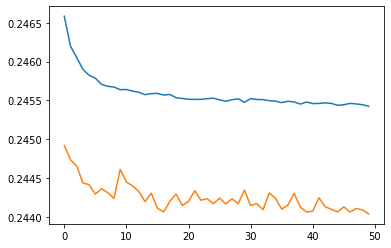

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# 建立模型

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from keras.initializers import he_normal
import os
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=he_normal(seed=0)))
model.add(keras.layers.Dense(100, activation='relu',
                      kernel_initializer=he_normal(seed=0)))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(1, activation='sigmoid'))


# adam =keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# # lr = 0.1
# # opt = SGD(lr)
# model.compile(optimizer=adam, loss="mse", metrics=['accuracy'])
adam = keras.optimizers.Adam(0.0006)

model.compile(optimizer=adam, loss="mse", metrics=['accuracy'])

model.summary()
# print('start fitting')

